In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = np.random.normal(100, 30, 100_000)


In [4]:
x.shape

(100000,)

In [5]:
x

array([ 87.96969125,  30.83334309, 124.39860606, ..., 133.54408923,
        96.4474836 , 115.91979098])

In [6]:
x = pd.Series(x)


<AxesSubplot:>

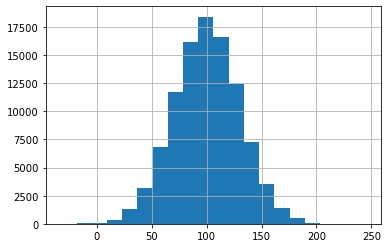

In [7]:
x.hist(bins=20)


# InterQuartile Range Rule
- Calculate the 1st and 3rd quartile numbers
- Calculate IQR = q3 - q1
- Determine our multiplier (1.5 or 3)
- Set the lower bound to be q1 - iqr * multiplier
- Set the upper bound to be q3 + iqr * multiplier
- Use the upper bound and lower bound to identify the observations outside those bounds
- Determine what to do with those outliers?


In [8]:
x.describe()

count    100000.000000
mean        100.095653
std          29.993080
min         -32.460760
25%          79.847174
50%         100.122557
75%         120.319909
max         244.796710
dtype: float64

In [9]:
q1 = x.quantile(0.25)
q3 = x.quantile(0.75)

q1, q3

(79.84717432270581, 120.31990850910384)

In [10]:
# Set the IQR multiplier to 1.5 to find the mild outliers
multiplier = 1.5

In [12]:
iqr = q3 - q1
iqr


40.47273418639803

In [13]:
iqr * multiplier


60.70910127959704

In [14]:
# lower outer fence: Q1 - 3*IQR
lower_fence = q1 - multiplier*iqr
lower_fence

19.13807304310877

In [16]:
upper_fence = q3 + multiplier*iqr
upper_fence

181.02900978870088

In [17]:
# Let's isolate the lower outliers from x
x[x <= lower_fence]

31       -5.991998
239      17.648753
287      17.738774
313      15.370211
518       2.676064
           ...    
99726    16.907318
99829    17.543993
99874    19.008772
99885    -2.767858
99890    13.641137
Length: 352, dtype: float64

In [18]:
x[x >= upper_fence]


21       181.215192
311      185.000169
433      182.070306
539      185.738117
542      184.014523
            ...    
99516    183.779520
99657    184.190291
99711    188.987273
99884    219.258386
99940    198.827815
Length: 355, dtype: float64

# Empirical Rule

In [19]:
zscores = (x - x.mean()) / x.std()


In [20]:
df = pd.DataFrame()
df["x"] = x
df["zscore"] = abs(zscores)

In [21]:
df.head()

,x,zscore
0,87.969691,0.404292
1,30.833343,2.309276
2,124.398606,0.810285
3,145.584589,1.516648
4,46.198605,1.796983


In [22]:
df.describe()

,x,zscore
count,100000.000000,100000.000000
mean,100.095653,0.797536
std,29.993080,0.603266
min,-32.460760,0.000011
25%,79.847174,0.317378
50%,100.122557,0.674688
75%,120.319909,1.150222
max,244.796710,4.824481


In [23]:
# Let's find all the values that are more than 3+ standard deviations from the mean
df[zscores >= 3]

,x,zscore
769,195.055277,3.166051
1029,192.122435,3.068267
1240,192.819250,3.091500
1573,192.273735,3.073312
3238,197.389900,3.243890
...,...,...
95389,206.644549,3.552449
96235,203.639900,3.452271
96614,200.479369,3.346896
99884,219.258386,3.973007


In [25]:
# Let's find all the values that are more than 2+ standard deviations from the mean
df[zscores >= 2]

,x,zscore
21,181.215192,2.704608
40,165.752856,2.189078
53,164.304171,2.140778
80,171.977474,2.396613
115,162.997852,2.097224
...,...,...
99813,179.708926,2.654388
99868,165.102903,2.167408
99884,219.258386,3.973007
99939,173.820025,2.458046


In [26]:
# How many observations are within 1 standard deviation?>
df[zscores <= 1]

,x,zscore
0,87.969691,0.404292
1,30.833343,2.309276
2,124.398606,0.810285
4,46.198605,1.796983
5,92.204879,0.263087
...,...,...
99994,62.190799,1.263787
99995,113.882540,0.459669
99996,114.493912,0.480053
99998,96.447484,0.121634


In [27]:
84179 / 100_000


0.84179

In [28]:
# How many observations are within 2 standard deviations?
df[zscores <= 2]

,x,zscore
0,87.969691,0.404292
1,30.833343,2.309276
2,124.398606,0.810285
3,145.584589,1.516648
4,46.198605,1.796983
...,...,...
99995,113.882540,0.459669
99996,114.493912,0.480053
99997,133.544089,1.115205
99998,96.447484,0.121634


In [29]:
# How many observations are within 3 standard deviations?
df[zscores <= 3]

,x,zscore
0,87.969691,0.404292
1,30.833343,2.309276
2,124.398606,0.810285
3,145.584589,1.516648
4,46.198605,1.796983
...,...,...
99995,113.882540,0.459669
99996,114.493912,0.480053
99997,133.544089,1.115205
99998,96.447484,0.121634


# discrete-probabilistic-methods

In [30]:

from __future__ import division

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns

**Wrangle Data**

In [31]:

colnames=['ip', 'timestamp', 'request_method', 'status', 'size',
          'destination', 'request_agent']
df_orig = pd.read_csv('http://python.zach.lol/access.log',          
                 engine='python',
                 header=None,
                 index_col=False,
                 names=colnames,
                 sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
                 na_values='"-"',
                 usecols=[0, 3, 4, 5, 6, 7, 8]
)

new = pd.DataFrame([["95.31.18.119", "[21/Apr/2019:10:02:41+0000]", 
                     "GET /api/v1/items/HTTP/1.1", 200, 1153005, np.nan, 
                     "python-requests/2.21.0"],
                    ["95.31.16.121", "[17/Apr/2019:19:36:41+0000]", 
                     "GET /api/v1/sales?page=79/HTTP/1.1", 301, 1005, np.nan, 
                     "python-requests/2.21.0"],
                    ["97.105.15.120", "[18/Apr/2019:19:42:41+0000]", 
                     "GET /api/v1/sales?page=79/HTTP/1.1", 301, 2560, np.nan, 
                     "python-requests/2.21.0"],
                    ["97.105.19.58", "[19/Apr/2019:19:42:41+0000]", 
                     "GET /api/v1/sales?page=79/HTTP/1.1", 200, 2056327, np.nan, 
                     "python-requests/2.21.0"]], columns=colnames)

df = df_orig.append(new)


In [32]:
df.head()

,ip,timestamp,request_method,status,size,destination,request_agent
0,97.105.19.58,[16/Apr/2019:19:34:42 +0000],"""GET /api/v1/sales?page=81 HTTP/1.1""",200,512495,NaN,"""python-requests/2.21.0"""
1,97.105.19.58,[16/Apr/2019:19:34:42 +0000],"""GET /api/v1/items HTTP/1.1""",200,3561,NaN,"""python-requests/2.21.0"""
2,97.105.19.58,[16/Apr/2019:19:34:44 +0000],"""GET /api/v1/sales?page=82 HTTP/1.1""",200,510103,NaN,"""python-requests/2.21.0"""
3,97.105.19.58,[16/Apr/2019:19:34:46 +0000],"""GET /api/v1/sales?page=83 HTTP/1.1""",200,510003,NaN,"""python-requests/2.21.0"""
4,97.105.19.58,[16/Apr/2019:19:34:48 +0000],"""GET /api/v1/sales?page=84 HTTP/1.1""",200,511963,NaN,"""python-requests/2.21.0"""


In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13978 entries, 0 to 3
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ip              13978 non-null  object
 1   timestamp       13978 non-null  object
 2   request_method  13978 non-null  object
 3   status          13978 non-null  int64 
 4   size            13978 non-null  int64 
 5   destination     25 non-null     object
 6   request_agent   13978 non-null  object
dtypes: int64(2), object(5)
memory usage: 873.6+ KB


**Parse Datetime**

In [34]:
df.timestamp = df.timestamp.str.replace(r'(\[|\])', '', regex=True)
df.timestamp= pd.to_datetime(df.timestamp.str.replace(':', ' ', 1)) 
df = df.set_index('timestamp')
df.head()

,ip,request_method,status,size,destination,request_agent
timestamp,,,,,,
2019-04-16 19:34:42+00:00,97.105.19.58,"""GET /api/v1/sales?page=81 HTTP/1.1""",200,512495,NaN,"""python-requests/2.21.0"""
2019-04-16 19:34:42+00:00,97.105.19.58,"""GET /api/v1/items HTTP/1.1""",200,3561,NaN,"""python-requests/2.21.0"""
2019-04-16 19:34:44+00:00,97.105.19.58,"""GET /api/v1/sales?page=82 HTTP/1.1""",200,510103,NaN,"""python-requests/2.21.0"""
2019-04-16 19:34:46+00:00,97.105.19.58,"""GET /api/v1/sales?page=83 HTTP/1.1""",200,510003,NaN,"""python-requests/2.21.0"""
2019-04-16 19:34:48+00:00,97.105.19.58,"""GET /api/v1/sales?page=84 HTTP/1.1""",200,511963,NaN,"""python-requests/2.21.0"""


In [35]:
df.destination.value_counts()


"https://python.zach.lol/"                                        4
"https://ds.codeup.com/8.3_Acquire/"                              3
"https://python.zach.lol/api/v1/stores?page=1"                    2
"https://python.zach.lol/api/v1/"                                 2
"https://python.zach.lol/api/v1/helloclass!"                      1
"https://python.zach.lol/api/v1/items?page=0"                     1
"https://python.zach.lol/api/v1/stores?page=999"                  1
"https://python.zach.lol/api/v1/items"                            1
"https://python.zach.lol/api/v1/stores?page=2"                    1
"https://python.zach.lol/api/V1/HiZach!"                          1
"http://localhost:8889/notebooks/timeseries_acquisition.ipynb"    1
"https://python.zach.lol/api/v1//api/v1/items"                    1
"http://localhost:8888/notebooks/acquire.ipynb"                   1
"https://python.zach.lol/api/v1//api/v1/items/next_page"          1
"https://python.zach.lol/api/v1/sales?page=3"   

**Clean up text**